In [10]:
import os, sys
root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)

In [11]:
from e_nose import file_reader 
from e_nose import data_processing as dp
from e_nose import data_visualization

%reload_ext autoreload
%autoreload 2

# Process data

read in data from a specific file

or all files from a from a directory

In [12]:
functionalisations, correct_channels, data = file_reader.read_all_files_in_folder('../data')

../data/data_wodka_orange_juice_red_wine_lemon_juice_coffee_garlic_10_loops_for_10.0_min_2020-01-03_11-08.csv


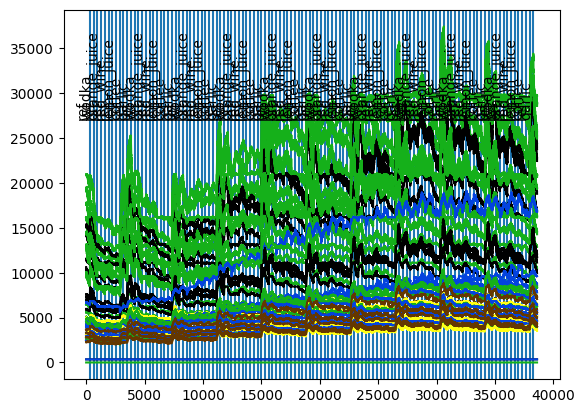

In [13]:
data_visualization.draw_all_channel_data_as_line(data, functionalisations)

../data/data_wodka_orange_juice_red_wine_lemon_juice_coffee_garlic_10_loops_for_10.0_min_2020-01-03_11-08.csv


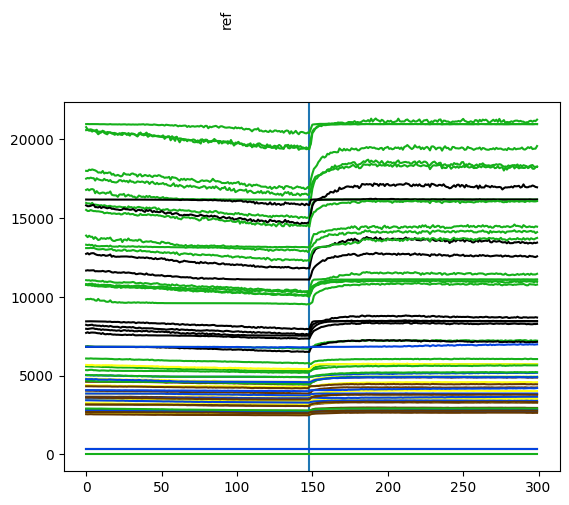

In [14]:
data_visualization.draw_all_channel_data_as_line(data, functionalisations, 4000 , 4300)

In [20]:
for file in data:
    print(file)
    print(data[file].keys())

../data/data_wodka_orange_juice_red_wine_lemon_juice_coffee_garlic_10_loops_for_10.0_min_2020-01-03_11-08.csv
dict_keys(['1578049737.7781599', '1578049739.6601617', '1578049741.542002', '1578049743.4253983', '1578049745.308439', '1578049747.1913297', '1578049749.074463', '1578049750.9577024', '1578049752.8401024', '1578049754.7229927', '1578049756.6060565', '1578049758.4885452', '1578049760.3715901', '1578049762.2548761', '1578049764.1378734', '1578049766.0201807', '1578049767.9036002', '1578049769.7863379', '1578049771.669399', '1578049773.552495', '1578049775.4349782', '1578049777.3179579', '1578049779.200609', '1578049781.0836265', '1578049782.9667733', '1578049784.8495343', '1578049786.7329473', '1578049788.6160545', '1578049790.4985824', '1578049792.3815646', '1578049794.2639108', '1578049796.1468012', '1578049798.0299275', '1578049799.9129958', '1578049801.7954032', '1578049803.6784432', '1578049805.561503', '1578049807.4445333', '1578049809.3277774', '1578049811.2109733', '15780

In [21]:
measurements_per_file = {}
for file in data:
    measurements_per_file[file] = dp.get_labeled_measurements(data[file], correct_channels, functionalisations)

In [23]:
measurements = []
for file in measurements_per_file:
    print("file: ",file)
    adding = dp.standardize_measurements(measurements_per_file[file])
    if adding is not None:
        measurements.extend(adding)

print(len(measurements))

file:  ../data/data_wodka_orange_juice_red_wine_lemon_juice_coffee_garlic_10_loops_for_10.0_min_2020-01-03_11-08.csv
60


In [72]:
labels = list(set([m.label for m in measurements]))
measurements_by_labels = {}
for i, l in enumerate(labels):
    measurements_by_labels[l] = []
for m in measurements:
    for i, l in enumerate(labels):
        if m.label == l:
            measurements_by_labels[l].append(m)  

['lemon_juice', 'garlic', 'wodka', 'orange_juice', 'red_wine', 'coffee']
{'lemon_juice': [], 'garlic': [], 'wodka': [], 'orange_juice': [], 'red_wine': [], 'coffee': []}
10


# KNN

In [92]:
num_classes = len(labels)
num_active_channels = measurements[0].get_data().shape[1]
print(num_classes, num_active_channels)

centroids = np.array([num_classes, num_active_channels])
print(measurements_by_labels['wodka'][0].get_data().shape)

#for i, l in enumerate(labels):
#    centroids[i] = np.mean(measurements_by_labels[l])

6 60
(319, 60)


In [93]:
import matplotlib.pyplot as plt

In [113]:
colors = ['blue', 'orange', 'yellow', 'green', 'red', 'purple', 'black', 'grey', 'grey', 'grey', 'grey']

lemon_juice


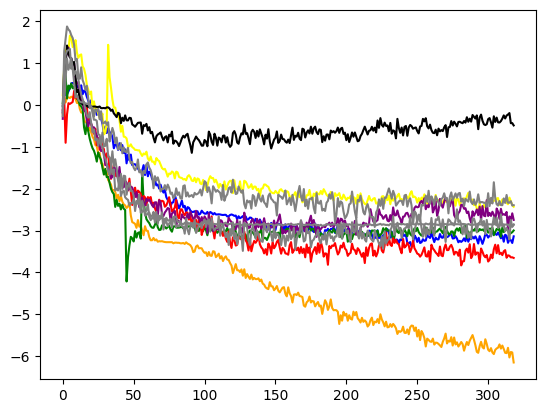

garlic


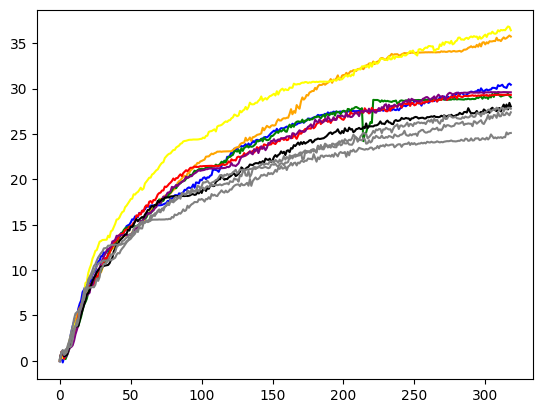

wodka


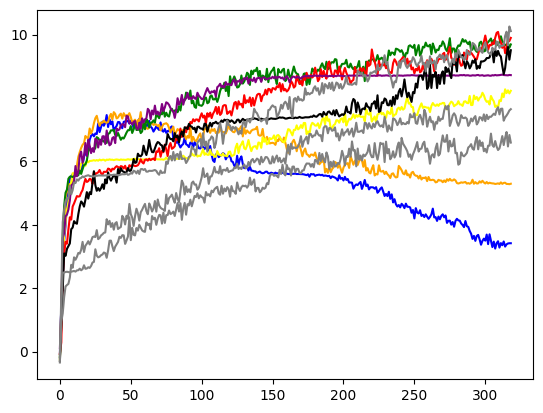

orange_juice


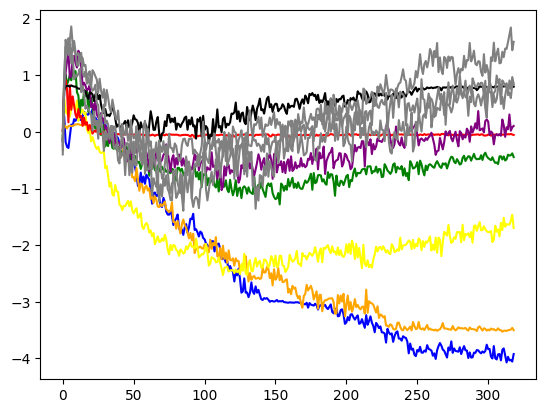

red_wine


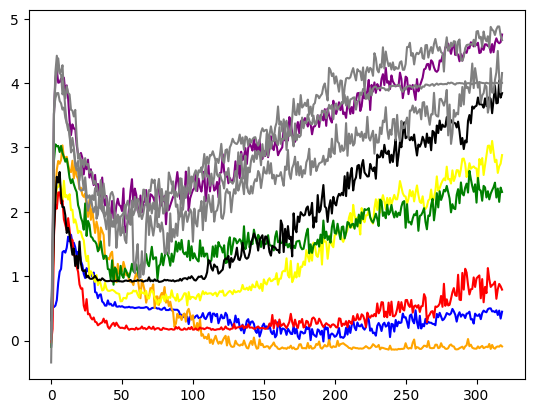

coffee


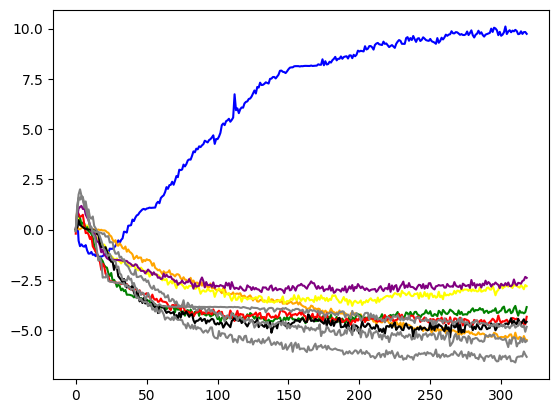

In [117]:
for l in labels:
    for r in range(10):
        plt.plot(measurements_by_labels[l][r].get_data()[:,1], color=colors[r])
    print(l)
    plt.show()


# PCA

In [49]:
all_the_data_array = None
all_variances = None

count = 0

for m in measurements:
    if all_the_data_array is None:
        all_the_data_array = m.get_data
    else: 
        all_the_data_array = np.vstack((all_the_data_array, m.get_data))
        
    #do PCA for every single measurement
    pca_single = PCA(15)
    pca_single.fit_transform(measurements[ts]['data'])
    explained_variance = pca_single.explained_variance_ratio_
    count += 1
    if all_variances is None:
        all_variances = explained_variance
    else:
        all_variances = np.vstack((all_variances, explained_variance))
        

var=np.cumsum(np.round(np.mean(all_variances,axis=0), decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')

plt.title('PCA Analysis')
plt.ylim(70,100.5)

plt.xticks(range(15))

plt.plot(var, label='averaged')

pca = PCA(15)
pca.fit_transform(all_the_data_array)
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(explained_variance, decimals=3)*100)
plt.plot(var, label='all')
for i in range(15):
    plt.axvline(x=i, alpha=0.2, color="grey")

plt.legend()
plt.show()

NameError: name 'PCA' is not defined

In [ ]:
pca = PCA(3)
pca.fit_transform(all_the_data_array)

fig = plt.figure()
ax = Axes3D(fig)

measurements_grouped_by_label = {}
colors = ['xkcd:green','xkcd:blue','xkcd:brown','xkcd:yellow','xkcd:black','xkcd:grey','xkcd:violet','xkcd:orange','xkcd:red']

groups = np.unique(functionalisations)
y_pos = np.arange(len(groups))

for ts in measurements:
    if measurements[ts]['label'] not in measurements_grouped_by_label:
        measurements_grouped_by_label[measurements[ts]['label']] = {}
    measurements_grouped_by_label[measurements[ts]['label']][ts] = measurements[ts]

count = 0
for label in measurements_grouped_by_label:
    xs = []
    ys = []
    zs = []
    
    for ts in measurements_grouped_by_label[label]:
        tmp = pca.transform(measurements_grouped_by_label[label][ts]['avgs'].reshape(1, -1))
        x,y,z = tmp[0]
        xs.append(x)
        ys.append(y)
        zs.append(z)
    
    ax.scatter(xs, ys, zs, color=colors[count], label=label)
    count+=1
    
plt.legend()
plt.show()
      

In [ ]:
pca = PCA(2)
pca.fit_transform(all_the_data_array)

fig, ax = plt.subplots()

measurements_grouped_by_label = {}
colors = ['xkcd:green','xkcd:blue','xkcd:brown','xkcd:yellow','xkcd:black','xkcd:grey','xkcd:violet','xkcd:orange','xkcd:red']

groups = np.unique(functionalisations)
y_pos = np.arange(len(groups))

for ts in measurements:
    if measurements[ts]['label'] not in measurements_grouped_by_label:
        measurements_grouped_by_label[measurements[ts]['label']] = {}
    measurements_grouped_by_label[measurements[ts]['label']][ts] = measurements[ts]

count = 0
for label in measurements_grouped_by_label:
    xs = []
    ys = []
    
    for ts in measurements_grouped_by_label[label]:
        tmp = pca.transform(measurements_grouped_by_label[label][ts]['avgs'].reshape(1, -1))
        x,y = tmp[0]
        xs.append(x)
        ys.append(y)
    
    ax.scatter(xs, ys, color=colors[count], label=label)
    count+=1
    
plt.legend()
plt.show()

# tSNE

In [74]:
import numpy as np

a = [1,2,3,4,5,6,7,8]
a = np.array(a)
b = [0,1,0,0,0,0,1,0]
b = np.array(b)
c = [False,True,False,False,False,False,True,False]
print(a[b.astype(bool)])
print(a[c])

[[1 2 3 4 5 6 7 8]]
[2 7]
